In [1]:
library(data.table)
library(ggplot2)

In [2]:
dt = data.table(read.table("../datasets/enwiki.scored_revision_sample.nonbot_10k.tsv", sep="\t", header=T))

In [3]:
dt.normalized = rbind(
    dt[,list(rev_id, model="damaging", proba=score.damaging.score.probability.true)],
    dt[,list(rev_id, model="goodfaith", proba=score.goodfaith.score.probability.true)])

png 
  2

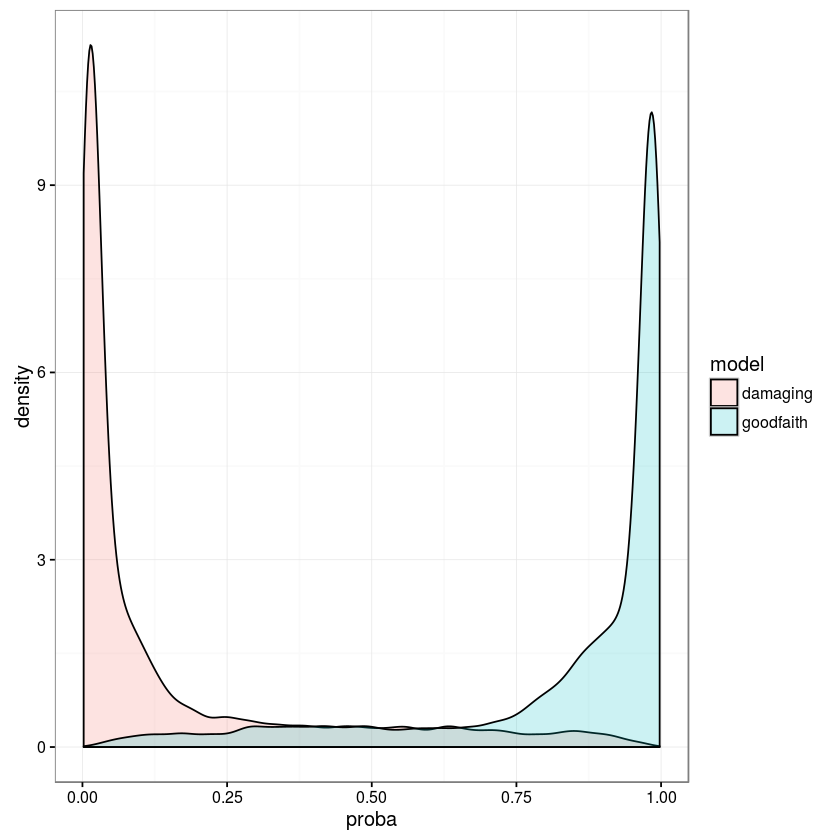

In [4]:
p = ggplot(dt.normalized, aes(x=proba, fill=model)) + 
theme_bw() + 
geom_density(alpha=0.2)
print(p)
svg("plots/enwiki.damaging_goodfaith.proba_density.svg", height=5, width=7)
print(p)
dev.off()

png 
  2

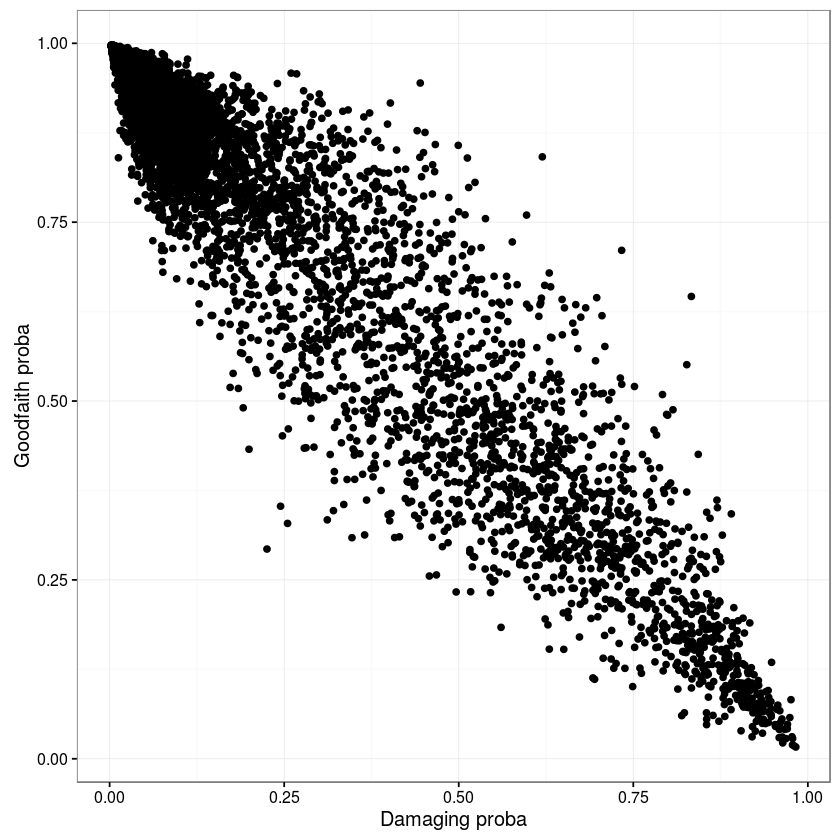

In [5]:
p = ggplot(dt, aes(x=score.damaging.score.probability.true, y=score.goodfaith.score.probability.true)) + 
theme_bw() + 
geom_point() + 
scale_x_continuous("Damaging proba") + 
scale_y_continuous("Goodfaith proba")
print(p)
svg("plots/enwiki.damaging_goodfaith.proba_scatter.svg", height=5, width=7)
print(p)
dev.off()

png 
  2

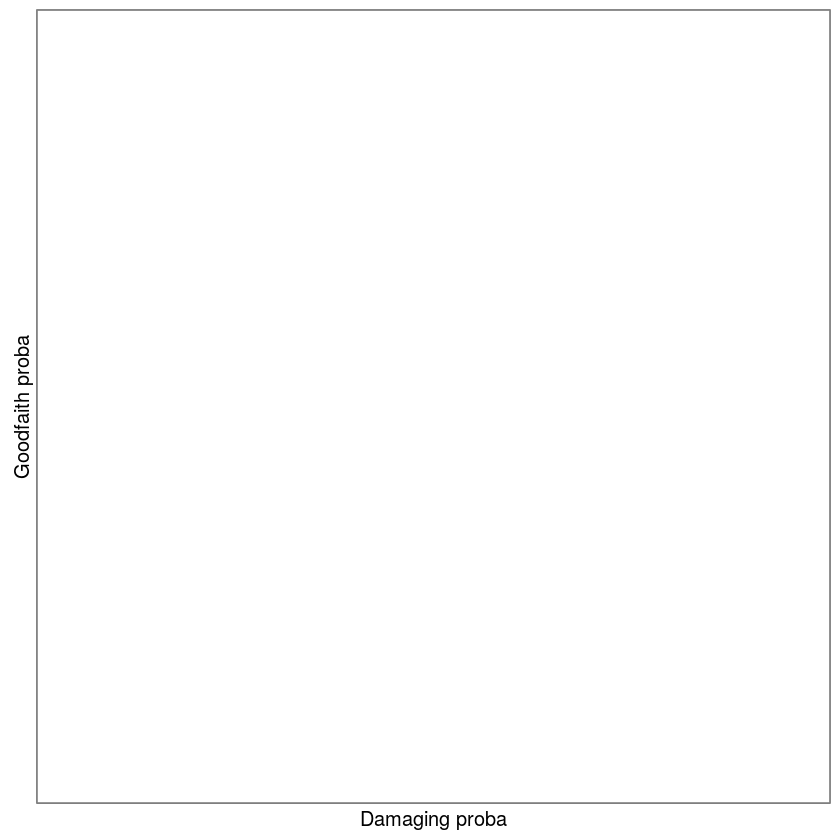

In [6]:
p = ggplot(
    dt[score.damaging.score.probability.true >= 0.879 &  
       score.goodfaith.score.probability.true >= 0.86,], 
    aes(x=score.damaging.score.probability.true, y=score.goodfaith.score.probability.true)) + 
theme_bw() + 
geom_point() + 
scale_x_continuous("Damaging proba") + 
scale_y_continuous("Goodfaith proba")
print(p)
svg("plots/enwiki.damaging_goodfaith.filtered_high.proba_density.svg", height=5, width=7)
print(p)
dev.off()

png 
  2

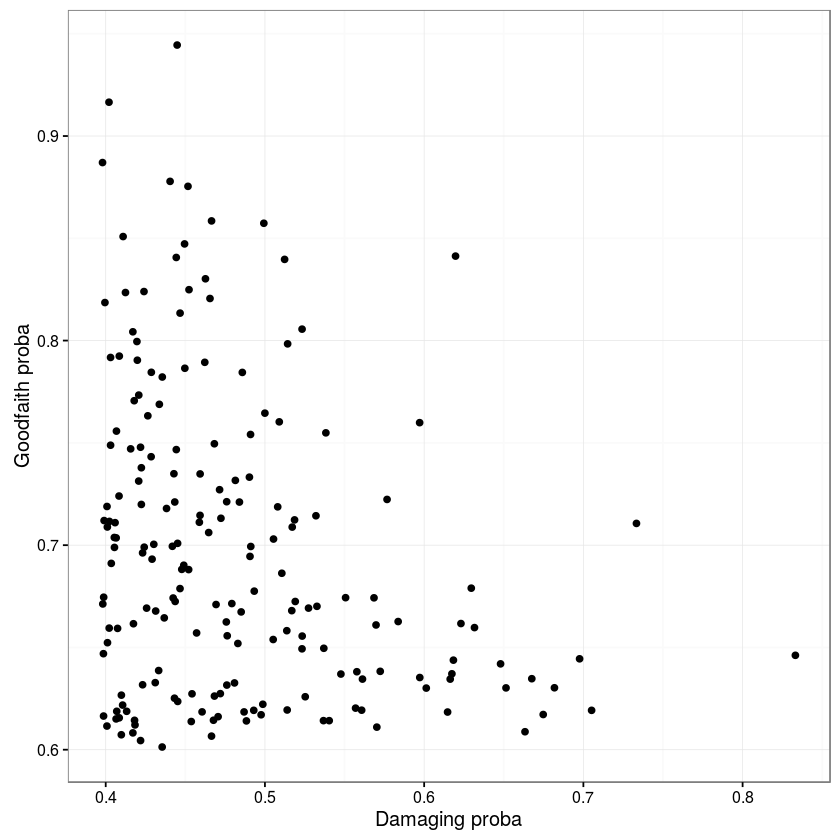

In [7]:
p = ggplot(
    dt[score.damaging.score.probability.true >= 0.398 &  # min_recall = 0.75
       score.goodfaith.score.probability.true >= 0.601,],  # min_precision = 0.99
    aes(x=score.damaging.score.probability.true, y=score.goodfaith.score.probability.true)) + 
theme_bw() + 
geom_point() + 
scale_x_continuous("Damaging proba") + 
scale_y_continuous("Goodfaith proba")
print(p)
svg("plots/enwiki.damaging_goodfaith.filtered_medium.proba_density.svg", height=5, width=7)
print(p)
dev.off()

In [8]:
dim(dt[score.damaging.score.probability.true >= 0.398 & 
       score.goodfaith.score.probability.true >= 0.601,])

[1] 189   3

In [9]:
dt[score.damaging.score.probability.true >= 0.398 & 
       score.goodfaith.score.probability.true >= 0.601,]

# 776491504	0.4011175	0.6523189 -- maybe damaging, goodfaith (newcomer, mobile edit)
# 776561939	0.5577317	0.6381191 -- maybe damaging, goodfaith (anon)
# 773901225	0.4808844	0.6326436 -- not damaging, goodfaith (anon)
# 776192598	0.5090065	0.7602717 -- not damaging, goodfaith (anon)
# 775184319	0.5168659	0.6679756 -- not damaging, goodfaith (anon)
# 776909321	0.4109281	0.8508490 -- damaging, goodfaith (newcomer)
# 773839838	0.4705899	0.6161455 -- damaging, goodfaith (newcomer)
# 775681846	0.3980012	0.8870231 -- not damaging, goodfaith (anon)
# 777385056	0.4906228	0.6944950 -- damaging, goodfaith (anon)
# 775954857	0.4083657	0.7240080 -- damaging, goodfaith (newcomer)
# 778629261	0.4156775	0.7470698 -- not damaging, goodfaith (anon)
# 777972078	0.4976089	0.6170718 -- not damaging, goodfaith (newcomer)
# 776171391	0.5123592	0.8396888 -- not damaging, goodfaith (anon, counter-vandalism)
# 775954413	0.3981722	0.6712455 -- damaging, goodfaith (anon)
# 774703855	0.4264561	0.7632287 -- not damaging, goodfaith (anon, adding category)
# 777069077	0.4241885	0.6990100 -- damaging, goodfaith (newcomer)
# 777864924	0.4098085	0.6073056 -- not damaging, goodfaith (anon, counter-vandalism)
# 774911971	0.4021984	0.6594416 -- damaging, goodfaith (anon, misplaced talk post)
# 775082597	0.6174247	0.6371081 -- damaging, goodfaith (anon, misplaced talk post)
# 778161116	0.4311144	0.6327798 -- not damaging, goodfaith (newcomer)
# 776781184	0.4929796	0.6192534 -- damaging, goodfaith (newcomer, BLP)
# 774472865	0.4664499	0.6066368 -- damaging, goodfaith (newcomer)
# 774799454	0.4839814	0.7210619 -- damaging, goodfaith (anon)
# 775569040	0.5607529	0.6193204 -- damaging, goodfaith (newcomer)
# 775292667	0.4404379	0.8778261 -- damaging, goodfaith (anon, failing to fix table)
# 775535192	0.4850735	0.6673567 -- damaging, goodfaith (anon)
# 775352387	0.4932909	0.6775150 -- damaging, goodfaith (anon)
# 776968902	0.4367727	0.6644402 -- not damaging, goodfaith (anon, mobile)
# 776072339	0.5684984	0.6742460 -- damaging, maybe badfaith (anon)
# 776084132	0.4516739	0.8753995 -- damaging, goodfaith (newcomer-ish)

rev_id,score.damaging.score.probability.true,score.goodfaith.score.probability.true
776491504,0.4011175,0.6523189
776561939,0.5577317,0.6381191
773901225,0.4808844,0.6326436
776192598,0.5090065,0.7602717
775184319,0.5168659,0.6679756
776909321,0.4109281,0.8508490
773839838,0.4705899,0.6161455
775681846,0.3980012,0.8870231
777385056,0.4906228,0.6944950
775954857,0.4083657,0.7240080
